In [3]:
import os
import shutil
from pathlib import Path

# Define the extracted folder path
extracted_folder = r"C:\Users\Max\Downloads\train"  
print("Folder exists:", os.path.exists(extracted_folder))
print("Number of files in the folder:", len(os.listdir(extracted_folder)))

Folder exists: True
Number of files in the folder: 2


In [5]:
import shutil
from pathlib import Path

extracted_folder = r"C:\Users\Max\Downloads\train" 

# Define the directory paths
cat_dir = Path(extracted_folder) / "cats"
dog_dir = Path(extracted_folder) / "dogs"

# Create subfolders for organization
cat_dir.mkdir(exist_ok=True)
dog_dir.mkdir(exist_ok=True)

# Debug file movement
for file in Path(extracted_folder).glob("*.jpg"):
    file_name = file.name.lower()  # Make the check case-insensitive
    if "cat" in file_name:
        shutil.move(file, cat_dir / file.name)
    elif "dog" in file_name:
        shutil.move(file, dog_dir / file.name)
    else:
        print(f"Skipping file: {file.name} (Doesn't match 'cat' or 'dog')")

print("File organization complete.")

File organization complete.


In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
from sklearn.model_selection import train_test_split

# Create directories for training and testing datasets
train_dir = Path(extracted_folder) / "train"
test_dir = Path(extracted_folder) / "test"
train_dir.mkdir(exist_ok=True)
test_dir.mkdir(exist_ok=True)

train_cats_dir = train_dir / "cats"
train_dogs_dir = train_dir / "dogs"
test_cats_dir = test_dir / "cats"
test_dogs_dir = test_dir / "dogs"

train_cats_dir.mkdir(parents=True, exist_ok=True)
train_dogs_dir.mkdir(parents=True, exist_ok=True)
test_cats_dir.mkdir(parents=True, exist_ok=True)
test_dogs_dir.mkdir(parents=True, exist_ok=True)

# Split cat images
cat_files = list(cat_dir.glob("*.jpg"))
if len(cat_files) > 0:
    train_cats, test_cats = train_test_split(cat_files, test_size=0.2, random_state=42)

    for file in train_cats:
        shutil.move(str(file), train_cats_dir / file.name)
    for file in test_cats:
        shutil.move(str(file), test_cats_dir / file.name)
else:
    print("No cat images found in the specified directory.")

# Split dog images
dog_files = list(dog_dir.glob("*.jpg"))
if len(dog_files) > 0:
    train_dogs, test_dogs = train_test_split(dog_files, test_size=0.2, random_state=42)

    for file in train_dogs:
        shutil.move(str(file), train_dogs_dir / file.name)
    for file in test_dogs:
        shutil.move(str(file), test_dogs_dir / file.name)
else:
    print("No dog images found in the specified directory.")

print("Data split into training and testing sets.")

Data split into training and testing sets.


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Set the path to the dataset directory
train_dir = "C:\\Users\\Max\\Downloads\\train"
test_dir = "C:\\Users\\Max\\Downloads\\test"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=40,         # Random rotations
    width_shift_range=0.2,     # Random horizontal shifts
    height_shift_range=0.2,    # Random vertical shifts
    shear_range=0.2,           # Random shear
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    fill_mode='nearest'        # Filling in missing pixels after transformations
)

# Rescaling for validation images 
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the test data

# Flow images from directories
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Max\Downloads\train",            
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,            # Batch size
    class_mode='binary'       # Binary classification (cats vs dogs)
)

validation_generator = test_datagen.flow_from_directory(
    "C:/Users/Max/Downloads/train",             
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,            # Batch size
    class_mode='binary'       # Binary classification (cats vs dogs)
)

Found 14942 images belonging to 2 classes.
Found 14942 images belonging to 2 classes.


In [12]:
from tensorflow.keras import layers, models

# Using an Input layer for the first layer
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),  # Define the input shape as (150, 150, 3) for RGB images
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output (0: cat, 1: dog)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# compile the model 

model.compile(
    loss='binary_crossentropy',   # Binary crossentropy for binary classification
    optimizer='adam',             # Adam optimizer
    metrics=['accuracy']          # Accuracy as evaluation metric
)

In [14]:
#train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,          # Steps per epoch (number of batches per epoch)
    epochs=5,                    # Number of epochs to train the model
    validation_data=validation_generator,
    validation_steps=50          # Steps for validation
)

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 945ms/step - accuracy: 0.7555 - loss: 0.6810 - val_accuracy: 0.8012 - val_loss: 0.5404
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 828ms/step - accuracy: 0.7990 - loss: 0.5091 - val_accuracy: 0.7987 - val_loss: 0.5078
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 779ms/step - accuracy: 0.7950 - loss: 0.5139 - val_accuracy: 0.8044 - val_loss: 0.5091
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 755ms/step - accuracy: 0.8157 - loss: 0.4943 - val_accuracy: 0.7987 - val_loss: 0.5139
Epoch 5/5
 67/100 ━━━━━━━━━━━━━━━━━━━━ 19s 592ms/step - accuracy: 0.7657 - loss: 0.5453

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 463ms/step - accuracy: 0.7715 - loss: 0.5385 - val_accuracy: 0.8112 - val_loss: 0.4846


In [15]:
test_loss, test_acc = model.evaluate(validation_generator, steps=50)
print(f"Test Accuracy: {test_acc}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.8100 - loss: 0.4866
Test Accuracy: 0.793749988079071


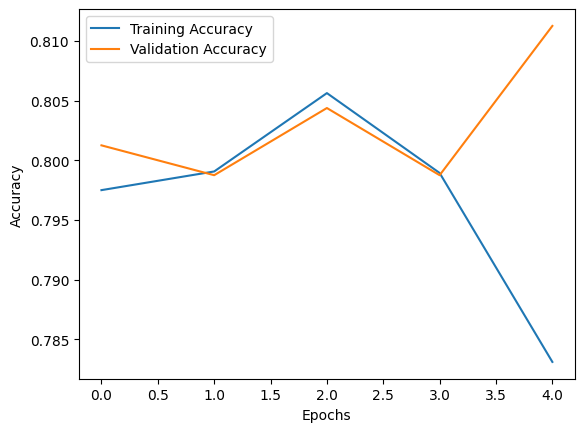

In [16]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image for prediction
img_path = r"C:\Users\Max\Downloads\test_2.jpg"  
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale image

# Make prediction
prediction = model.predict(img_array)
print("Prediction: ", "Dog" if prediction[0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Prediction:  Dog


In [19]:
# Load an image for prediction
img_path = r"C:\Users\Max\Downloads\test_1.jpg"  
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale image

# Make prediction
prediction = model.predict(img_array)
print("Prediction: ", "Cat" if prediction[0] > 0.5 else "dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction:  Cat


In [21]:
import matplotlib.image as mpimg

In [29]:
# Define the paths for the images
img_path = r"C:\Users\Max\Downloads\test_1.jpg"  # Replace with actual path

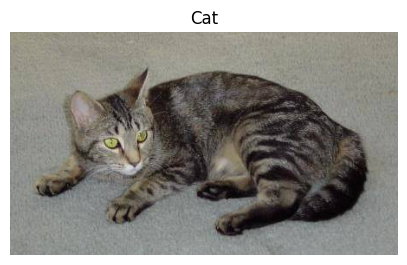

In [30]:
# Load and display the cat image
img = mpimg.imread(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

In [31]:
# Define the paths for the images
img_path = r"C:\Users\Max\Downloads\test_2.jpg"  # Replace with actual path

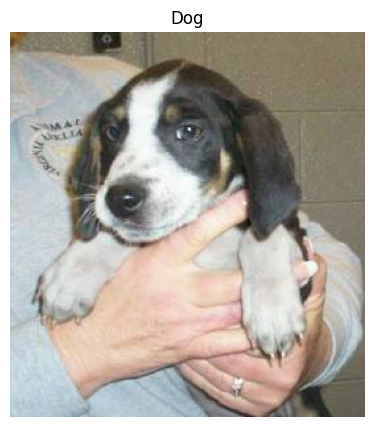

In [51]:
# Load and display the cat image
img = mpimg.imread(img_path)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()